# TSNE

https://www.datacamp.com/tutorial/introduction-t-sne

TSNE vs PCA:
- PCA is linear and TSNE is non-linear, which more closely represents the structuure of the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
syn_path = "../sdg-models/tabsyn/synthetic/adult/tabsyn.csv"
real_path = "../sdg-models/tabsyn/synthetic/adult/real.csv"

df_syn = pd.read_csv(syn_path)
df_real = pd.read_csv(real_path)

# since gen-data is most likely be oversampled 
# code to reduce amount of gen data

combined_df = pd.concat([df_real, df_syn], ignore_index=True)
labels = ["Real"] * len(df_real) + ["Generated"] * len(df_syn)

In [3]:
df_syn

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25.000000,Private,158438.840,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,Black,Male,0.0,0.0,50.0,United-States,>50K
1,61.964825,Self-emp-not-inc,55712.227,Assoc-acdm,12.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,35.0,United-States,>50K
2,56.000000,Private,177650.780,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
3,42.000000,Private,176665.560,Assoc-voc,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688.0,0.0,40.0,United-States,>50K
4,43.000000,Private,200199.620,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33753,35.000000,Local-gov,564228.900,10th,9.0,Never-married,Protective-serv,Not-in-family,White,Female,0.0,0.0,60.0,United-States,>50K
33754,23.000000,Private,162021.550,HS-grad,9.0,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
33755,30.000000,Private,156882.780,HS-grad,9.0,Never-married,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
33756,43.003124,Self-emp-not-inc,289768.940,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [4]:
df_real

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,35.0,Private,143058.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
1,60.0,Private,325971.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,7688.0,0.0,40.0,United-States,>50K
2,47.0,Private,183522.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Wife,Black,Female,0.0,0.0,40.0,United-States,>50K
3,31.0,State-gov,161631.0,Some-college,10.0,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
4,41.0,Private,49797.0,Some-college,10.0,Separated,Exec-managerial,Not-in-family,Black,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,30.0,Private,231826.0,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
15678,32.0,Private,37070.0,Assoc-voc,11.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,45.0,United-States,<=50K
15679,48.0,Self-emp-inc,382242.0,Doctorate,16.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,>50K
15680,39.0,Private,96452.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,55.0,United-States,>50K


In [11]:
combined_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,35.000000,Private,143058.00,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
1,60.000000,Private,325971.00,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,7688.0,0.0,40.0,United-States,>50K
2,47.000000,Private,183522.00,Some-college,10.0,Married-civ-spouse,Exec-managerial,Wife,Black,Female,0.0,0.0,40.0,United-States,>50K
3,31.000000,State-gov,161631.00,Some-college,10.0,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
4,41.000000,Private,49797.00,Some-college,10.0,Separated,Exec-managerial,Not-in-family,Black,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,35.000000,Local-gov,564228.90,10th,9.0,Never-married,Protective-serv,Not-in-family,White,Female,0.0,0.0,60.0,United-States,>50K
49436,23.000000,Private,162021.55,HS-grad,9.0,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
49437,30.000000,Private,156882.78,HS-grad,9.0,Never-married,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
49438,43.003124,Self-emp-not-inc,289768.94,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [17]:
# apply label enoding
label_encoders = {}
for col in combined_df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le

In [19]:
# normalize data 
scaler = StandardScaler()
normalized_data = scaler.fit_transform(combined_df)


In [23]:
normalized_data.shape

(49440, 15)

In [24]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(normalized_data)

In [26]:
tsne_results.shape

(49440, 2)

In [28]:
tsne_df = pd.DataFrame(tsne_results, columns=['Dim1', 'Dim2'])
tsne_df['Label'] = labels

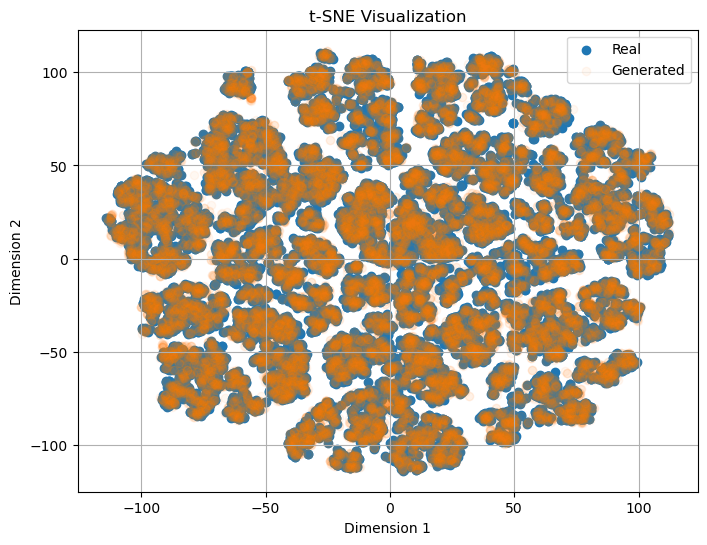

In [34]:
plt.figure(figsize=(8, 6))
for label in tsne_df['Label'].unique():
    subset = tsne_df[tsne_df['Label'] == label]
    alpha = 0.05 if label == 'Generated' else 1.0
    plt.scatter(subset['Dim1'], subset['Dim2'], label=label, alpha=alpha)

plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()